<a href="https://colab.research.google.com/github/warwavn/AI-SUT2025/blob/main/Day%209%20Deep%20Learning%20Introduction/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/AI_SUT_2025_Workspace/ex2_icecream_sales_data - ex2_icecream_sales_data.csv')

In [6]:
x = df['Temperature']
y = df['Revenue']

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(6, input_shape=[1]))
model.add(tf.keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5),loss='mean_squared_error')
hist = model.fit(x,y, epochs = 300)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 117417.2031
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8756.7676  
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1738.9922 
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 852.2886  
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 672.1809
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 631.7271  
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 662.2832 
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 644.4367
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 609.3882
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 669.8886 
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 584.4146 
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 613.2616 
Epoch 13/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 675.4682 
Epoch 14/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 677.4411 
Epoch 15/300
16/16 ━━━━━━

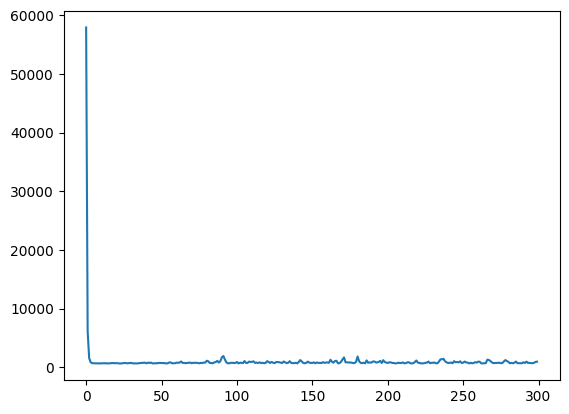

In [38]:
plt.plot(hist.history['loss'])

In [39]:
y_pred = model.predict(x)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


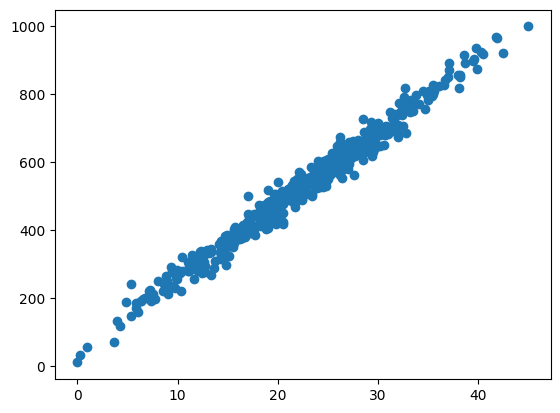

In [40]:
plt.scatter(x,y)
# plt.pl

In [41]:
y_pred_df = pd.DataFrame(y_pred)

In [42]:
y_pred_df

,0
0,566.265564
1,596.745789
2,634.580750
3,482.101471
4,289.429565
...,...
495,517.694397
496,742.712402
497,312.415375
498,519.548706


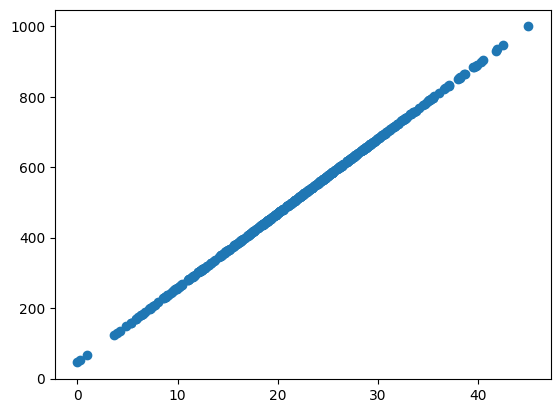

In [46]:
plt.scatter(x,y_pred_df)

In [43]:
temp = np.array([5,10,20,30,40])
rev_pred = model.predict(temp)

rev_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[151.60913],
       [257.56784],
       [469.4853 ],
       [681.4028 ],
       [893.3201 ]], dtype=float32)

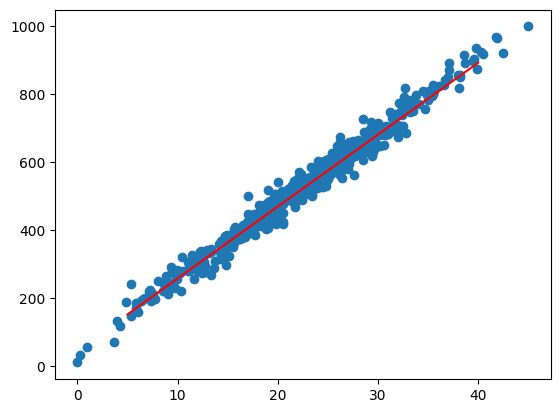

In [45]:
plt.scatter(x,y)
plt.plot(temp,rev_pred,c='r')